In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [2]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)


In [3]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
movies_df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [5]:
#movies_df[pd.isnull(movies_df).any(axis=1)]
len(movies_df)-movies_df['IMDb'].count()

571

In [6]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index().rename(columns={"film":"Title"})
# .rename(columns={"index":"Title", "film":"Nomination"})
df2.head()

,Title,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1


In [7]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2.head()

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,All about Eve,14


In [8]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,Gigi,9


In [9]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,All about Eve,14,6.0
...,...,...,...
4828,The Living Desert,1,1.0
4829,Gold,1,0.0
4830,Tribute,1,0.0
4831,Strange Fruit,1,0.0


In [10]:
#Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [11]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [12]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [61]:
combined_df.describe()


,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,Nomination,Wins,Won Best Picture
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16744.000000,16744.000000,16744.000000,16744.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,90.110726,0.098722,0.020306,0.004240
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,32.646537,0.700416,0.217918,0.071125
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,80.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,91.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,103.250000,0.000000,0.000000,0.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000,25.000000,5.000000,2.000000


In [14]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [15]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [16]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [17]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [18]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0


In [19]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")
combined_df2.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [20]:
combined_df['Genres'].value_counts()

Drama                                             1341
Documentary                                       1229
Comedy                                            1040
Comedy,Drama                                       446
Horror                                             436
                                                  ... 
Animation,Adventure,Comedy,Musical                   1
Crime,Drama,Sport,Thriller                           1
Adventure,Crime,Drama,History,Thriller,Western       1
Short,Action,Comedy,Crime,Drama                      1
Action,Family,Sci-Fi                                 1
Name: Genres, Length: 1909, dtype: int64

In [21]:
genres_df = combined_df[['Genres', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Genres')
genres_df.head(10)

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
"Action,Sci-Fi",1,0,0,0
"Action,Adventure,Sci-Fi",1,0,0,0
"Adventure,Comedy,Sci-Fi",1,0,0,0
Western,1,0,1,0
"Animation,Action,Adventure,Family,Sci-Fi",1,0,0,0
"Biography,Drama,Music,War",1,0,1,0
"Drama,Western",1,0,0,0
"Action,Adventure",1,0,0,0


In [22]:
country_df = combined_df['Country'].value_counts()
country_df.head(15)


United States                   8776
India                           1064
United Kingdom                   905
Canada                           555
Australia                        202
Japan                            175
United Kingdom,United States     172
France                           167
Hong Kong                        153
Canada,United States             150
Italy                            142
United States,Canada             138
South Korea                      122
Spain                            115
Germany                          103
Name: Country, dtype: int64

In [23]:
#countries_stream_df = combined_df[['Country', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Country')
#countries_stream_df.dropna(how='any')
#bool_series = pd.isnull(countries_stream_df['Hulu'])
#countries_stream_df[bool_series]
#countries_stream_df
stream_services_country = combined_df.groupby('Country')[['Netflix', 'Hulu', 'Prime Video','Disney+']].count()
#stream_services_country_df = stream_services_country.to_frame()
stream_services_country.head()

,Netflix,Hulu,Prime Video,Disney+
Country,,,,
"Afghanistan,France",1,1,1,1
"Afghanistan,United States",1,1,1,1
"Albania,Austria,France",1,1,1,1
"Albania,Greece,France",1,1,1,1
"Albania,United States",1,1,1,1


In [24]:
#Create new dataframe excluding null values from 'Country'
country_df = combined_df[combined_df['Country'].isna()==False]
country_df

#Split genres name and count no. of movies in each genre
country_count = {}
for x in country_df["Country"].values:

    country_list = x.split(",")
    #print (country_list)
    for y in country_list:
        y = y.strip()
        #print(y)
        if y not in country_count:
            country_count[y]=0
        country_count[y] +=1
        #print(country_count)
    
#country_count

country_name = country_count.keys() 
count_country = country_count.values() 



allcountries_df=pd.DataFrame(count_country, country_name)
allcountries_df.head(10)
#country_df

,0
United States,10486
United Kingdom,1713
Italy,417
Spain,329
West Germany,69
France,741
Poland,63
Germany,498
India,1157
Mexico,183


In [25]:
#Select the top 15 countries by value counts
country_top_df = allcountries_df[0:15]

country_top_df=country_top_df.reset_index().rename(columns={'index':'Country', 0:'Counts'})

country_top_df= country_top_df.sort_values('Counts',ascending = False)

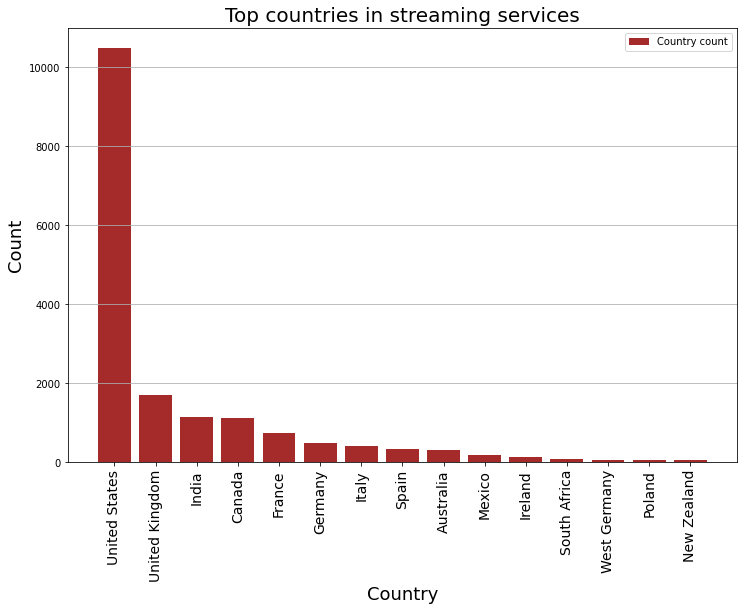

In [26]:
#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()

In [27]:
combined_df['Language'].value_counts().head(15)

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Korean                90
English,German        83
German                76
Hindi,English         72
English,Italian       67
Name: Language, dtype: int64

In [62]:
#Create new dataframe excluding null values from 'Language'
language_df = combined_df[combined_df['Language'].isna()==False]

#Split genres name and count no. of movies in each genre
language_count = {}
for x in language_df["Language"].values:

    language_list = x.split(",")
    #print (language_list)
    for y in language_list:
        y = y.strip()
        #print(y)
        if y not in language_count:
            language_count[y]=0
        language_count[y] +=1
        #print(country_count)
    
#country_count

language_name = language_count.keys() 
count_language = language_count.values() 



alllanguages_df=pd.DataFrame(count_language, language_name)
alllanguages_df.head(10)

,0
English,13233
Japanese,317
French,799
Italian,440
Spanish,872
German,483
Russian,222
Hebrew,86
Arabic,190
Nepali,6


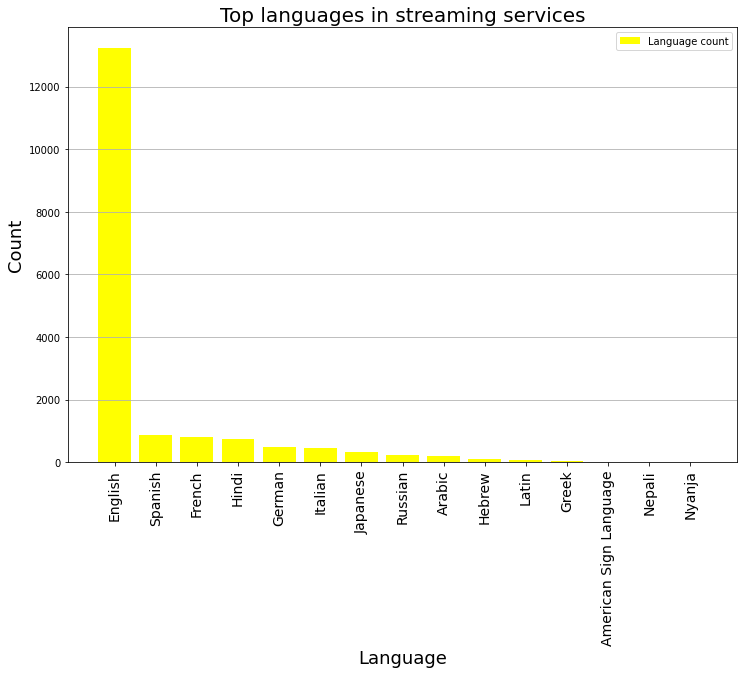

In [29]:
#Select the top 15 languages by value counts
language_top = alllanguages_df[0:15]
language_top_df=language_top.reset_index().rename(columns={'index':'Language', 0:'Counts'})
language_top_df= language_top_df.sort_values('Counts',ascending = False)

#Specify x & y values
xvalues = language_top_df['Language'].values
yvalues= language_top_df['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='yellow', alpha = 1, align="center")
plt.xticks(language_top_df['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in streaming services", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/languages.png")
plt.show()

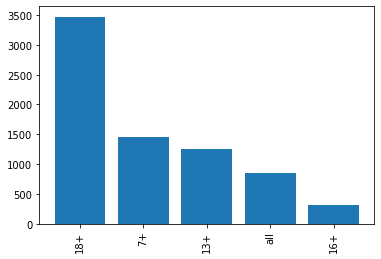

In [30]:
age = combined_df['Age'].value_counts()
#age
age_df=age.to_frame().reset_index().rename(columns={"index":"Age", "Age":"Counts"})
#age_df = age_df.set_index()
#age_df.set_index(Age)
#plt.pie =(age_df['Counts'].values, labels = index.values)
#plt.show()
#plt.pie(group_netflix.values,labels=group_netflix.index)
plt.bar(age.index, age.values)
plt.xticks(age.index, rotation=90)
plt.show()

In [31]:
#Create a dataframe for Netflix values =1
#netflix_data = combined_df.copy()
netflix_data = combined_df[combined_df['Netflix']==1]

#Create a dataframe for Prime Video values =1
#prime_data = combined_df.copy()
prime_data = combined_df[combined_df['Prime Video']==1]

#Create a dataframe for Hulu values =1
#hulu_data = combined_df.copy()
hulu_data = combined_df[combined_df['Hulu']==1]

#Create a dataframe for Disney+ values =1
#disney_data = combined_df.copy()
disney_data = combined_df[combined_df['Disney+']==1]

In [32]:
#Create separate dataframes for streaming services with only US data in it

netflix_data_US = netflix_data[(netflix_data['Country'] == 'United States')]

prime_data_US = prime_data[(prime_data['Country'] == 'United States')]

hulu_data_US = hulu_data[(hulu_data['Country'] == 'United States')]

disney_data_US = disney_data[(disney_data['Country'] == 'United States')]

In [63]:
#Analysing no. of movies in each streaming service for their Rotten Tomotaes scoring

#Fill Nan values in Rotten Tomatoes with 0
combined_df["Rotten Tomatoes"] = combined_df["Rotten Tomatoes"].fillna(0)

#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")

#Sort by descending order
rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)

#Convert it to dataframe and rename columns
rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings',
                                                                      'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df
# combined_df['Rotten Tomatoes'].value_counts()
#combined_df["Rotten Tomatoes"].dtypes

,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126
...,...,...
94,28,10
95,5,10
96,4,9
97,2,4


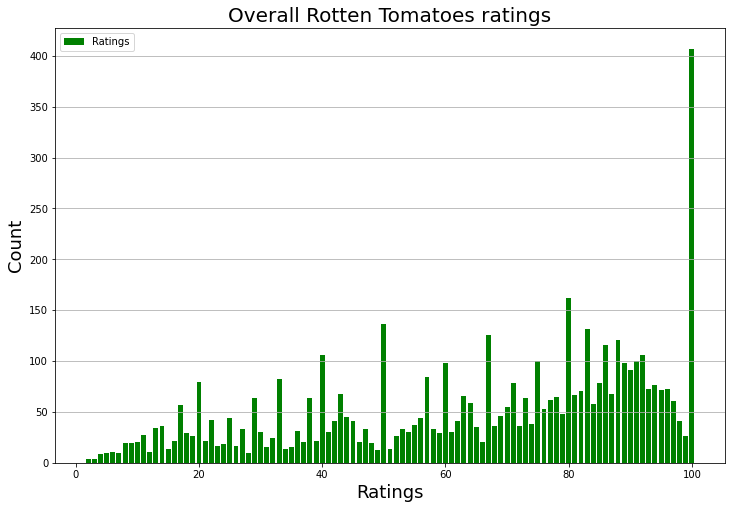

In [64]:
#Plot overall Rotten Tomatoes for all streaming services combined
rot_x = rotten_tomatoes_df['Ratings'].values.astype("int")
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
ticks=(np.arange(10, 100, step=10))
# plt.xticks(ticks, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/rot_tom.png")
plt.show()

In [35]:
#Analysing streaming services for content with 100% Rotten Tomatoes scoring. (Taking 100% RT score because there
#is highest no. of movies at this score. Refer to 'Overall RT ratings' plot)


# List of service names
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Taking data of RT score 100% (first row of value counts)
netflix_rt = netflix_data['Rotten Tomatoes'].value_counts()[0]
hulu_rt =hulu_data['Rotten Tomatoes'].value_counts()[0]
prime_rt = prime_data['Rotten Tomatoes'].value_counts()[0] 
disney_rt = disney_data['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt, hulu_rt, prime_rt, disney_rt]})
                                                                         
rot_tom_scores


,Streaming Service,No. of movies with 100% RT score
0,Netflix,130
1,Hulu,18
2,Prime Video,257
3,Disney+,19


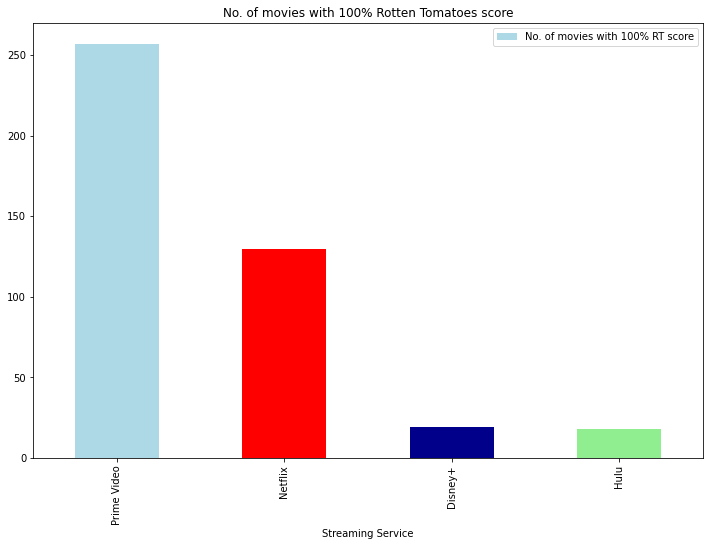

In [36]:
#plt.figure(figsize=(12,8))
rot_tom_scores.sort_values(ascending=False, by="No. of movies with 100% RT score").plot.bar('Streaming Service', 
                                        'No. of movies with 100% RT score', 
                                         color=["lightblue", "red", "darkblue", "lightgreen"],
                                        figsize=(12,8), title=('No. of movies with 100% Rotten Tomatoes score'))
                                                                               
plt.show()
#plt.title('No. of movies with 100% Rotten Tomatoes score')

In [65]:
#Analysing 100% RT score for movies in US only

netflix_rt_US = netflix_data_US['Rotten Tomatoes'].value_counts()[0]
hulu_rt_US =hulu_data_US['Rotten Tomatoes'].value_counts()[0]
prime_rt_US = prime_data_US['Rotten Tomatoes'].value_counts()[0] 
disney_rt_US = disney_data_US['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt_US, hulu_rt_US,
                                                                     prime_rt_US, disney_rt_US]})
                                                                         
rot_tom_scores_US

,Streaming Service,No. of movies with 100% RT score
0,Netflix,63
1,Hulu,12
2,Prime Video,141
3,Disney+,15


<AxesSubplot:title={'center':'No. of movies with 100% Rotten Tomatoes score (US)'}, xlabel='Streaming Service'>

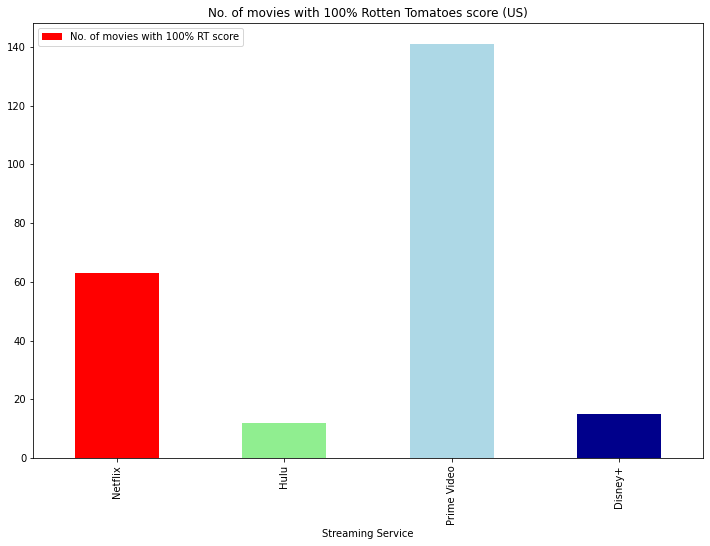

In [66]:
#Analysing 100% RT score for movies in US only
#plt.figure(figsize=(12,8))
rot_tom_scores_US.plot.bar('Streaming Service', 'No. of movies with 100% RT score', 
                           color=["red", "lightgreen", "lightblue", "darkblue"], 
                           title=('No. of movies with 100% Rotten Tomatoes score (US)'), figsize=(12,8) )
                                                                              
#plt.show()

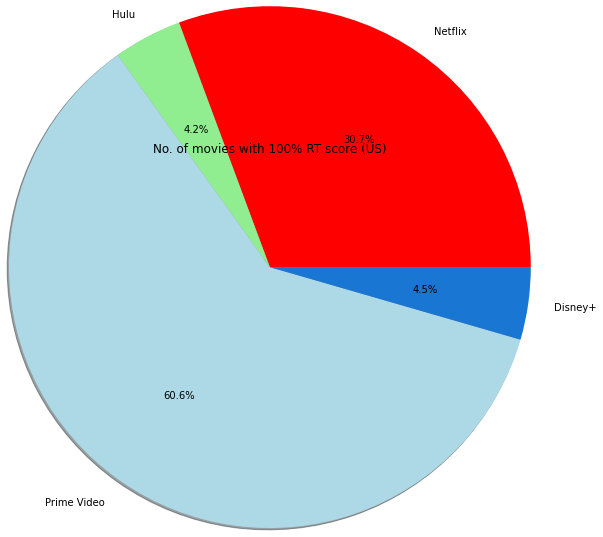

In [67]:
plt.pie(rot_tom_scores["No. of movies with 100% RT score"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%", radius=3)
plt.title("No. of movies with 100% RT score (US)")
plt.show()

In [68]:
combined_df['IMDb'].fillna(0)
imdb = combined_df['IMDb'].value_counts().reset_index().sort_values("index").set_index("index")
imdb

,IMDb
index,
0.0,4
1.0,2
1.3,1
1.4,4
1.5,2
...,...
8.8,14
8.9,11
9.0,3


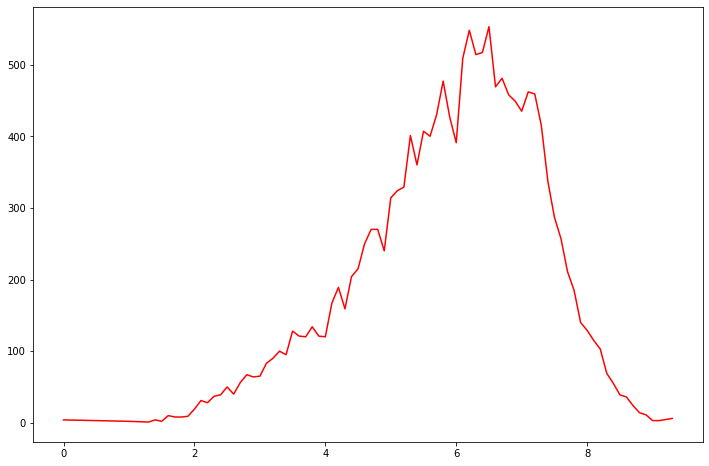

In [69]:
plt.figure(figsize=(12,8))
plt.plot(imdb.index, imdb["IMDb"], color="Red")

In [42]:
#Netflix movies count for year 2015-2020
netflix_new = netflix_data[netflix_data["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new

netflix_new_df = netflix_new.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count for year 2015-2020
prime_new = prime_data[prime_data["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new

prime_new_df = prime_new.to_frame().reset_index()
prime_new_df.T

#Hulu movies count for year 2015-2020
hulu_new = hulu_data[hulu_data["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new

hulu_new_df = hulu_new.to_frame().reset_index()
hulu_new_df.T

#Disney movies count for year 2015-2020
disney_new = disney_data[disney_data["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new

disney_new_df = disney_new.to_frame().reset_index()
disney_new_df

,Year,Disney+
0,2015,10
1,2016,17
2,2017,22
3,2018,16
4,2019,23
5,2020,9


In [43]:
merge1 = pd.merge(hulu_new_df, disney_new_df, on='Year' )
merge2 = pd.merge(prime_new_df, netflix_new_df, on='Year')
year_merge = pd.merge(merge1, merge2, on='Year')
year_merge.set_index('Year')

,Hulu,Disney+,Prime Video,Netflix
Year,,,,
2015,61,10,765,272
2016,62,17,730,444
2017,124,22,763,569
2018,158,16,625,560
2019,104,23,172,428
2020,6,9,31,104


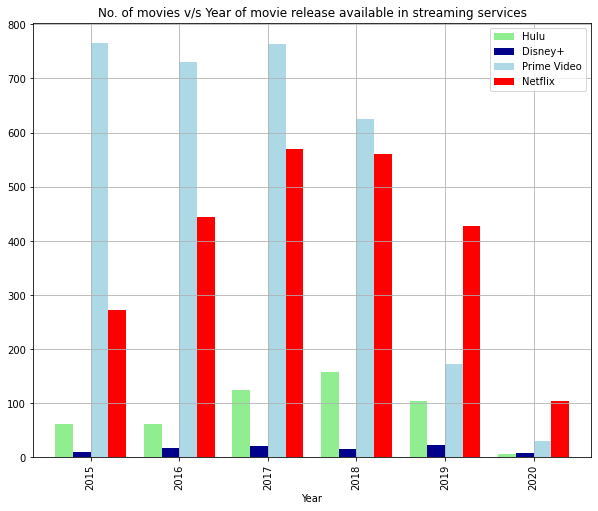

In [77]:
year_merge.plot.bar('Year',  color=["lightgreen", "darkblue", "lightblue", "red"], figsize=(10,8), width=0.8)
                   
plt.title('No. of movies v/s Year of movie release available in streaming services')
plt.grid()

In [78]:
#Netflix movies count in US for year 2015-2020 
netflix_new_US = netflix_data_US[netflix_data_US["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new_US

netflix_new_df_US = netflix_new_US.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count in US for year 2015-2020
prime_new_US = prime_data_US[prime_data_US["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new_US

prime_new_df_US = prime_new_US.to_frame().reset_index()
prime_new_df_US.T

#Hulu movies count in US for year 2015-2020
hulu_new_US = hulu_data_US[hulu_data_US["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new_US

hulu_new_df_US = hulu_new_US.to_frame().reset_index()
hulu_new_df_US.T

#Disney movies count in US for year 2015-2020
disney_new_US = disney_data_US[disney_data_US["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new_US

disney_new_df_US = disney_new_US.to_frame().reset_index()
disney_new_df_US

,Year,Disney+
0,2015,9
1,2016,15
2,2017,18
3,2018,13
4,2019,17
5,2020,9


In [79]:
merge1_US = pd.merge(hulu_new_df_US, disney_new_df_US, on='Year' )
merge2_US = pd.merge(prime_new_df_US, netflix_new_df_US, on='Year')
year_merge_US = pd.merge(merge1_US, merge2_US, on='Year')
year_merge_US.set_index('Year')

,Hulu,Disney+,Prime Video,Netflix
Year,,,,
2015,34,9,410,93
2016,35,15,409,153
2017,59,18,390,219
2018,90,13,302,197
2019,65,17,100,181
2020,5,9,16,53


Text(0.5, 1.0, 'No. of movies v/s Year of movie release available in streaming services (US)')

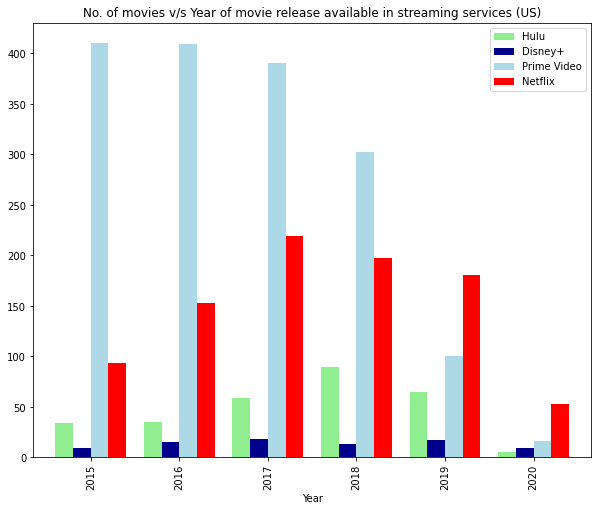

In [80]:
new_release_US=year_merge_US.plot.bar('Year',  color=["lightgreen", "darkblue", "lightblue", "red"], figsize=(10,8), width=.8)
plt.title('No. of movies v/s Year of movie release available in streaming services (US)')

In [86]:
# Count of movies produced in last 20 years

movie_count = combined_df.Year.value_counts()[:20].reset_index().sort_values(['Year'], ascending=True).rename(
                                                            columns = {"index": "Year" , "Year" : "Count"})
movie_count.head()

,Year,Count
19,2001,156
18,2000,172
17,2002,193
16,2003,214
15,2004,217


<Figure size 1440x720 with 0 Axes>

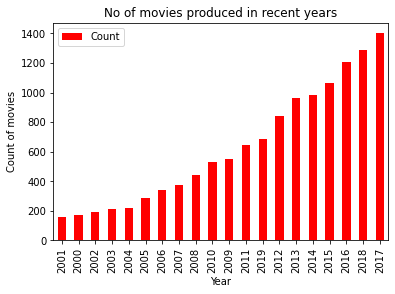

In [87]:
# Plot count of movies produced in last 20 years

plt.figure(figsize = (20,10))
movie_count.plot.bar("Year", "Count", colormap='autumn', alpha=1.0)
plt.title("No of movies produced in recent years")
plt.xlabel("Year")
plt.ylabel("Count of movies", )
plt.show()

In [50]:
netflix_lang = netflix_data_US["Language"].value_counts().head(20)
netflix_lang_df = netflix_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
netflix_lang_df.head(20)

,Language,Count
0,English,1094
1,"English,Spanish",40
2,"English,French",23
3,"English,Japanese",7
4,"English,German",5
5,"English,Spanish,French",5
6,"English,Mandarin",5
7,"English,Ukrainian",4
8,"English,American Sign Language",4
9,"English,Italian",3


Text(0.5, 1.0, 'Top 20 languages of Netflix movies')

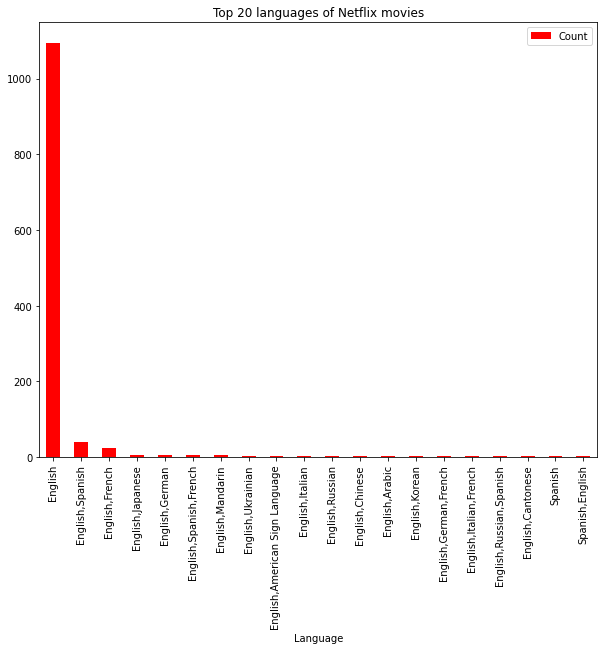

In [51]:
netflix_lang_df.plot.bar('Language', figsize=(10,8), color='red')
plt.title('Top 20 languages of Netflix movies')

In [52]:
hulu_lang = hulu_data_US["Language"].value_counts().head(15)
hulu_lang_df = hulu_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
hulu_lang_df.head(20)

,Language,Count
0,English,416
1,"English,Spanish",14
2,"English,French",11
3,"English,Klingon",3
4,"English,Italian",3
5,"English,Russian",3
6,"English,French,German",2
7,"English,Arabic",2
8,"English,German",2
9,"English,Italian,German,French",2


Text(0.5, 1.0, 'Top 20 languages of Hulu movies')

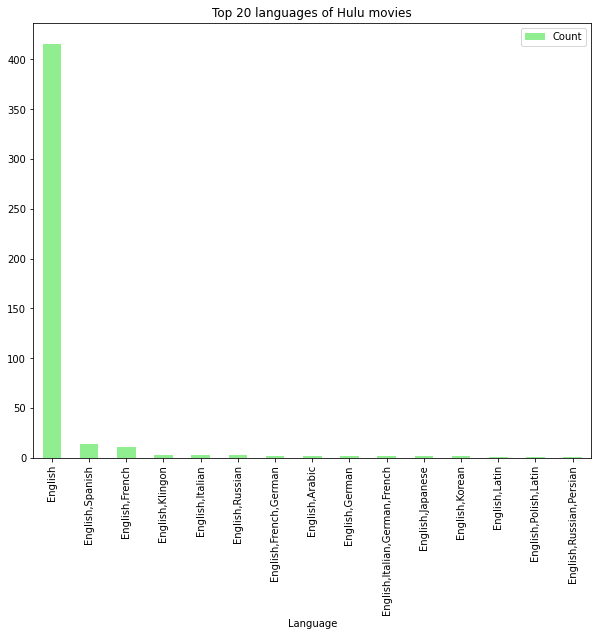

In [53]:
hulu_lang_df.plot.bar('Language', figsize=(10,8), color='lightgreen')
plt.title('Top 20 languages of Hulu movies')

In [54]:
prime_lang = prime_data_US["Language"].value_counts().head(15)
prime_lang_df = prime_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
prime_lang_df.head(20)

,Language,Count
0,English,6200
1,"English,Spanish",119
2,"English,French",42
3,"English,German",23
4,"English,Italian",16
5,"English,Japanese",11
6,"Spanish,English",10
7,"English,Korean",8
8,"English,American Sign Language",7
9,"English,Hebrew",7


Text(0.5, 1.0, 'Top 20 languages of Prime Video movies')

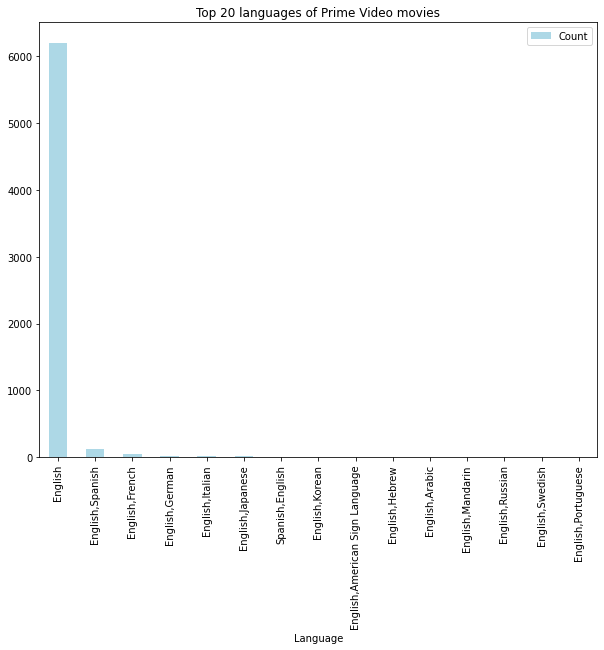

In [55]:
prime_lang_df.plot.bar('Language', figsize=(10,8), color="lightblue")
plt.title('Top 20 languages of Prime Video movies')

In [56]:
disney_lang = disney_data_US["Language"].value_counts().head(15)
disney_lang_df = disney_lang.to_frame().reset_index().rename(columns={'index':'Language','Language':'Count'} )
disney_lang_df.head(20)

,Language,Count
0,English,367
1,"English,French",15
2,"English,Spanish",7
3,"English,German",6
4,"English,Italian",3
5,"English,Arabic",2
6,"English,Mandarin",2
7,"English,French,Spanish",2
8,"English,Portuguese",2
9,"English,Korean",2


Text(0.5, 1.0, 'Top 20 languages of Disney movies')

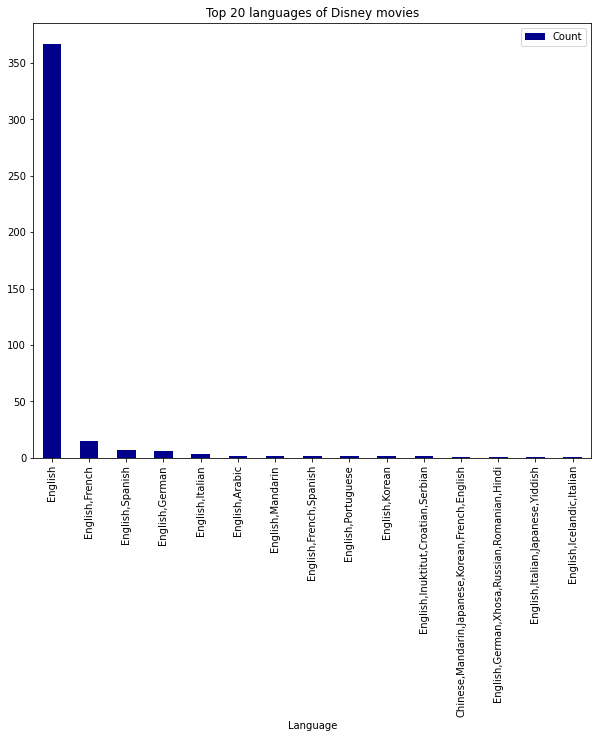

In [57]:
disney_lang_df.plot.bar('Language', figsize=(10,8), color='darkblue')
plt.title('Top 20 languages of Disney movies')

In [58]:
#Analysing IMDb score for movies in US only

netflix_imdb_US = netflix_data_US[netflix_data_US['IMDb'] > 7]
net_imdb_count = netflix_imdb_US['IMDb'].count()

hulu_imdb_US =hulu_data_US[hulu_data_US['IMDb']> 7]
hulu_imdb_count = hulu_imdb_US['IMDb'].count()


prime_imdb_US = prime_data_US[prime_data_US['IMDb']> 7] 
prime_imdb_count = prime_imdb_US['IMDb'].count()


disney_imdb_US = disney_data_US[disney_data_US['IMDb']> 7]  
disney_imdb_count = disney_imdb_US['IMDb'].count()
                                                            
                                                             

imdb_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with IMDb > 7' :[net_imdb_count, hulu_imdb_count,
                                                                     prime_imdb_count, disney_imdb_count]})
                                                                         
imdb_scores_US



,Streaming Service,No. of movies with IMDb > 7
0,Netflix,327
1,Hulu,106
2,Prime Video,1059
3,Disney+,135


<AxesSubplot:title={'center':'No. of movies with IMDb > 7 (US)'}, xlabel='Streaming Service'>

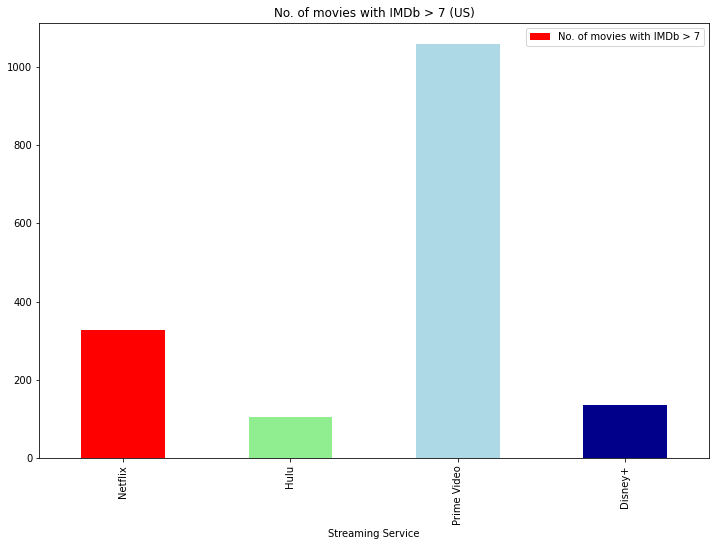

In [59]:
#Analysing movies with IMDb > 7 in US only
#plt.figure(figsize=(12,8))
imdb_scores_US.plot.bar('Streaming Service', 'No. of movies with IMDb > 7', 
                           color=["red", "lightgreen", "lightblue", "darkblue"], 
                            title=('No. of movies with IMDb > 7 (US)'), figsize=(12,8) )

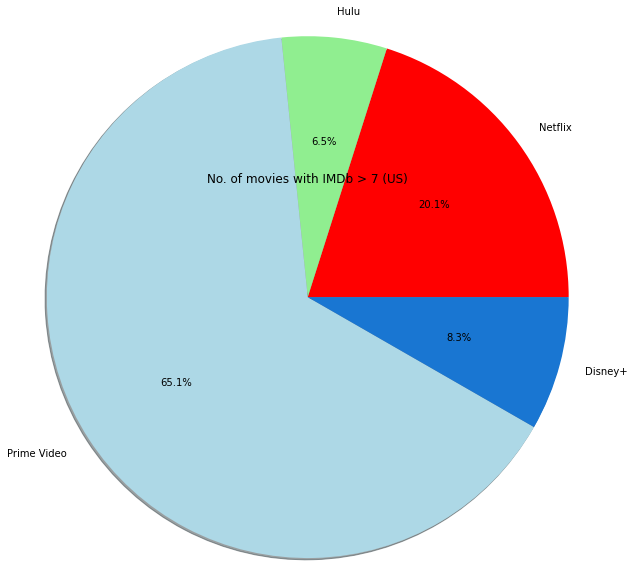

In [60]:
plt.pie(imdb_scores_US["No. of movies with IMDb > 7"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%", radius=3)

plt.title("No. of movies with IMDb > 7 (US)")
plt.show()